# Plot CR effect: transmon-transmon vs transmon-fluxonium in the linear approximation

In [1]:
import numpy as np
import time
import scipy.interpolate
import matplotlib.pyplot as plt
from typing import List, Dict, Callable
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
import copy
import json

from IPython.display import display, Latex

In [2]:
with open("data_cr_transmon_transmon/data_cr_transmon_transmon_linear.txt") as file_data:
    result_tt = json.load(file_data)
with open("data_cr_transmon_fluxonium/data_cr_transmon_fluxonium_linear.txt") as file_data:
    result_tf = json.load(file_data)

In [3]:
def plot_cr_tt_tf(
    result_tt: List[dict],
    result_tf: List[dict],
    opt={'fs': 20, 'lw': 2.0, 'ls': 16, 'fsl':18, "ms":8},
    save=False
):
    freq = []
    gate_time_tt = []
    gate_time_tf = []
    zz_tt = []
    zz_tf = []
    for res_tt, res_tf in zip(result_tt, result_tf):
        freq.append(res_tt["freq"])
        
        gate_time_tt.append(res_tt["gate_time_sw"])
        gate_time_tf.append(res_tf["gate_time_sw"])
        zz_tt.append(np.abs(res_tt["zz"])*1e3 )
        zz_tf.append(np.abs(res_tf["zz"])*1e3)
        
    fig, ax = plt.subplots(2, figsize=(6, 12))
    
    
    colors = {"tt": "darkblue", "tf": "red"}
    
    ax[0].semilogy(freq, gate_time_tt, linestyle="--", linewidth=opt["lw"], 
                   color=colors["tt"], label="Transmon-transmon")
    ax[0].semilogy(freq, gate_time_tf, linestyle="-", linewidth=opt["lw"], 
                   color=colors["tf"], label="Transmon-fluxonium")
    ax[1].plot(freq, zz_tt, linestyle="--", linewidth=opt["lw"], 
               color=colors["tt"], label="Transmon-transmon")
    ax[1].plot(freq, zz_tf, linestyle="-", linewidth=opt["lw"], 
               color=colors["tf"], label="Transmon-fluxonium")
    ax[1].set_xlabel("$\omega_t/2 \pi \, (\mathrm{GHz})$", fontsize=opt["fs"])
    x_ticks = [4.2 + 0.2*x for x in range(9)]
    ax[0].set_ylim(100, 10000)
    ax[1].set_ylim(0.0, 350)
    x_ticks = [4.2 + 0.2*x for x in range(9)]
    ax[0].set_xticks(x_ticks)
    ax[1].set_xticks(x_ticks)
    x_ticks_latex = ['$' + str(x)[:3] + '$' for x in x_ticks]
    ax[0].set_xticklabels(x_ticks_latex)
    ax[1].set_xticklabels(x_ticks_latex)
    y_ticks = [100, 1000, 10000]
    ax[0].set_yticks(y_ticks)
    y_ticks_latex = ['$10^2$', '$10^3$', '$10^4$']
    ax[0].set_yticklabels(y_ticks_latex)
    y_ticks = [0 + 50*x for x in range(8)]
    ax[1].set_yticks(y_ticks)
    y_ticks_latex = ['$0$', '$50$', '$100$', "$150$", "$200$", "$250$", "$300$", "$350$"]
    ax[1].set_yticklabels(y_ticks_latex)
    ax[0].tick_params(axis='both', labelsize=opt["ls"])
    ax[1].tick_params(axis='both', labelsize=opt["ls"])
    ax[0].set_ylabel("$t_{\\mathrm{gate}}^{(\mathrm{id})} \, (\\mathrm{ns})$", fontsize=opt["fs"])
    ax[1].set_ylabel("$|\\xi_{ZZ}|/2 \pi  \, (\\mathrm{kHz})$", fontsize=opt["fs"])
    ax[0].legend(loc='upper center', fontsize=opt["fsl"])
    ax[1].legend(loc='lower center', fontsize=opt["fsl"])
    if save:
        plt.savefig("tt_tf_cr_time_zz.svg")
    plt.show()

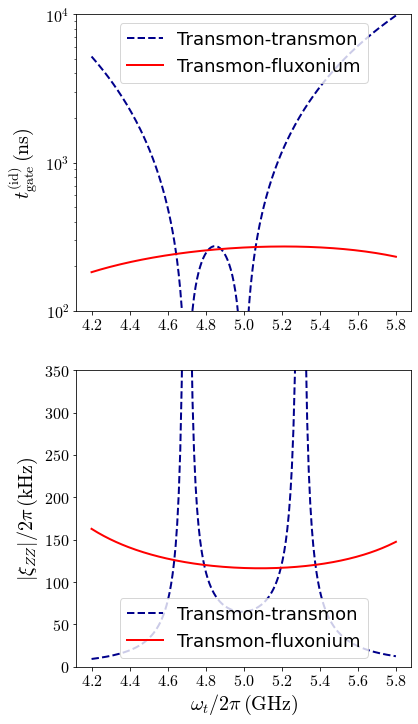

In [4]:
plot_cr_tt_tf(result_tt, result_tf, save=False)